# Blindness Detection Image Recognition

In [2]:
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)
!ls "/content/drive/My Drive"

Mounted at /content/drive/
'ASM EXAM MFE 9ed.pdf'	'Justice - Airplane Powerpoint Template (1)'
'Case prep materials'	 machine_learning_project
 Colab_Notebooks


In [3]:
cd 'drive/My Drive/machine_learning_project/'

/content/drive/My Drive/machine_learning_project


## 1. Exploratory Data Analysis

In [4]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import cv2
import numpy as np
import keras.layers as Layers
import keras.activations as Actications
import keras.models as Models
import keras.optimizers as Optimizer
import keras.metrics as Metrics
import keras.utils as Utils
import matplotlib.gridspec as gridspec
from keras.utils.vis_utils import model_to_dot
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
from keras.utils import plot_model
from keras.utils.vis_utils import plot_model
from PIL import Image
from tqdm import tqdm
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### 1.1 Read in the dataset & images

In [5]:
#list files in the directory
os.listdir('data/')

['train.csv', 'processed_images', 'processed_color_images']

In [6]:
#read in training dataset
#df_train = pd.read_csv('train.csv', index_col = 0)
df_train = pd.read_csv('data/train.csv')
df_train.head()

id_code  diagnosis
0  000c1434d8d7          2
1  001639a390f0          4
2  0024cdab0c1e          1
3  002c21358ce6          0
4  005b95c28852          0

In [7]:
df_train['diagnosis'].unique()

array([2, 4, 1, 0, 3])

* There are 5 categories that the images can belong to. Here I am matching them with the diagnosis information in the data set.

In [8]:
#add label column into training dataset
def add_label(df):
    if df['diagnosis'] == 0:
        val = "No DR"
    elif df['diagnosis'] == 1:
        val = "Mild"
    elif df['diagnosis'] == 2:
        val = "Moderate"
    elif df['diagnosis'] == 3:
        val = "Severe"
    elif df['diagnosis'] == 4:
        val = "Poliferative DR"
    return val
df_train['diagnosis_names'] = df_train.apply(add_label, axis=1)

In [9]:
df_train.head()

id_code  diagnosis  diagnosis_names
0  000c1434d8d7          2         Moderate
1  001639a390f0          4  Poliferative DR
2  0024cdab0c1e          1             Mild
3  002c21358ce6          0            No DR
4  005b95c28852          0            No DR

## 3. Modeling

In [10]:
#Import necessary libraries
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2
from sklearn.utils import shuffle
from random import randint
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.manifold import TSNE
from sklearn.ensemble import AdaBoostClassifier
from IPython.display import SVG

### 3.1 Machine learning Modeling

In [11]:
SEED = 53
IMG_SIZE = 225
NUM_CLASSES =5

**TSNE Visualization**

In [12]:
labelMap = {
    0:'No DR',
    1:'Mild',
    2:'Moderate',
    3:'Severe',
    4:'Proliferative DR'
}

In [13]:
# read in the preprocessed images
N = df_train.shape[0]
X = np.empty((N, 225, 225, 3), dtype=np.uint8)

for i, image_id in enumerate(tqdm(df_train['id_code'])):
    X[i, :, :, :] = cv2.imread(
        f'data/processed_images/{image_id}.png'

    )

100%|██████████| 3662/3662 [24:47<00:00,  2.46it/s]


In [ ]:
# normalize
X1 = X / 225

# reshape
X1 = X1.reshape(X1.shape[0], -1)

trainX, valX, trainy, valy = train_test_split(X1, df_train['diagnosis'], test_size=0.5, random_state=1220)

In [ ]:
X_decomposed = TSNE(n_components=2).fit_transform(trainX)

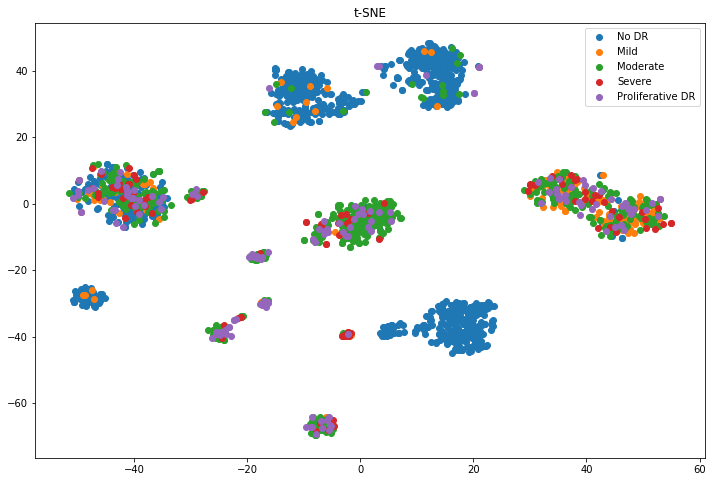

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

for i in range(5):
    idx = trainy == i
    ax.scatter(X_decomposed[idx, 0], X_decomposed[idx, 1], label=labelMap[i])
ax.set_title("t-SNE")
ax.legend()

**PCA--Reduced Dimension**

In [ ]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [ ]:
y = df_train['diagnosis']

In [ ]:
print(X.shape)
print(y.shape)

(3662, 225, 225, 3)
(3662,)


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# reshape
X_norm = X.reshape(X.shape[0], -1)

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=SEED)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

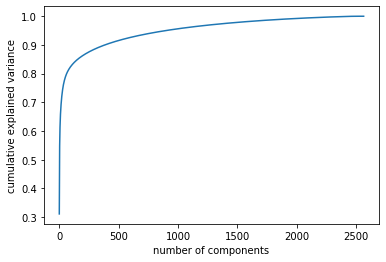

In [ ]:
pca = PCA().fit(X_train_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
pca = PCA(n_components=750).fit(X_train_scaled)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.fit_transform(X_test_scaled)

#### 3D Plot

In [ ]:
train_idx = 2563

In [ ]:
pca = PCA(n_components=3)
emb = pca.fit_transform(X_train_scaled)
te_emb = emb[train_idx:]
emb = emb[:train_idx]

In [ ]:
y = y_train
init_notebook_mode(connected=True)

In [ ]:
data = [go.Scatter3d(
    x=emb[np.array(y) == t, 0],
    y=emb[np.array(y) == t, 1],
    z=emb[np.array(y) == t, 2],
    mode='markers',
    marker=dict(
        size=3,
        opacity=0.75
    ),
    name=labelMap[t]
)
    for t in list(set(y))
]

In [ ]:
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode()

In [ ]:
data.append(go.Scatter3d(
    x=te_emb[:, 0],
    y=te_emb[:, 1],
    z=te_emb[:, 2],
    mode='markers',
    marker=dict(
        color='#c0c0c0',
        size=2,
        opacity=0.75
    ),
    name='test data'
))

layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='simple-3d-scatter')

#### Balance Data with SMOTE 

In [ ]:
from imblearn.over_sampling import SMOTE
# using SMOTE for unbalanced data
X_train_pca_s, y_train_s= SMOTE().fit_resample(X_train_pca, y_train)

In [ ]:
import collections
collections.Counter(y_train_s)

Counter({0: 1264, 4: 1264, 1: 1264, 2: 1264, 3: 1264})

**Classification Modeling**

**Logistic Regression Classification**

In [ ]:
from sklearn.linear_model import LogisticRegression
Mod_1 = LogisticRegression(random_state=SEED,
                           multi_class='ovr').fit(X_train_pca_s, 
                                                  y_train_s.values.ravel())

C:\Users\betty\Anaconda3\envs\keras-gpu\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\betty\Anaconda3\envs\keras-gpu\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\b

In [ ]:
Mod_1.score(X_train_pca_s, y_train_s.values.ravel())

0.9382911392405063

In [ ]:
y_pred1 = Mod_1.predict(X_test_pca)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.83      0.72      0.77       541
           1       0.25      0.22      0.24       117
           2       0.47      0.38      0.42       300
           3       0.05      0.14      0.08        57
           4       0.08      0.13      0.10        84

    accuracy                           0.50      1099
   macro avg       0.34      0.32      0.32      1099
weighted avg       0.57      0.50      0.53      1099



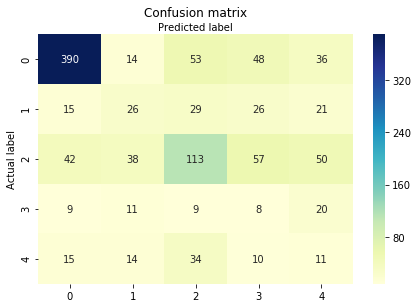

In [ ]:
from sklearn.metrics import confusion_matrix
class_names=[0,1,2,3,4] # name  of classes
cnf_matrix=confusion_matrix(y_test,  y_pred1,class_names)

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))


# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")

ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names)

plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
y_pred2 = Mod_1.predict(X_train_pca_s)
print(classification_report(y_train_s, y_pred2))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1264
           1       0.91      0.94      0.93      1264
           2       0.93      0.82      0.87      1264
           3       0.94      0.99      0.97      1264
           4       0.91      0.95      0.93      1264

    accuracy                           0.94      6320
   macro avg       0.94      0.94      0.94      6320
weighted avg       0.94      0.94      0.94      6320



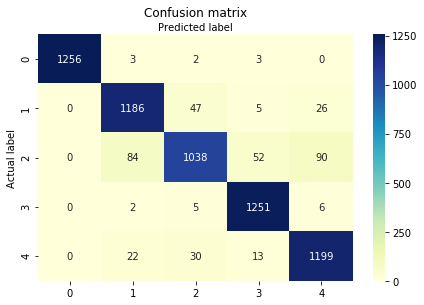

In [ ]:
from sklearn.metrics import confusion_matrix
class_names=[0,1,2,3,4] # name  of classes
cnf_matrix=confusion_matrix(y_train_s,y_pred2,class_names)

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))


# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")

ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names)

plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=2,
                             random_state=SEED)
clf.fit(X_train_pca_s, y_train_s)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=53, verbose=0,
                       warm_start=False)

In [ ]:
y_pred3 = clf.predict(X_train_pca_s)
y_pred_prob3 = clf.predict_proba(X_train_pca_s)
print(classification_report(y_train_s, y_pred3))

              precision    recall  f1-score   support

           0       0.68      0.92      0.78      1264
           1       0.46      0.70      0.55      1264
           2       0.49      0.33      0.39      1264
           3       0.70      0.34      0.46      1264
           4       0.45      0.44      0.45      1264

    accuracy                           0.55      6320
   macro avg       0.56      0.55      0.53      6320
weighted avg       0.56      0.55      0.53      6320



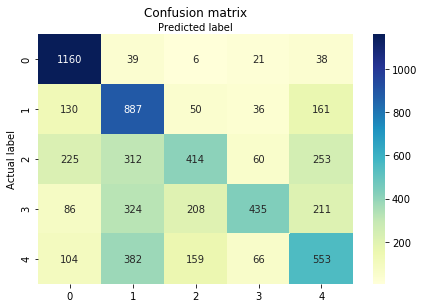

In [ ]:
class_names=[0,1,2,3,4] # name  of classes
cnf_matrix=confusion_matrix(y_train_s, y_pred3,class_names)

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))


# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")

ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names)

plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
y_pred = clf.predict(X_test_pca)
y_pred_prob = clf.predict_proba(X_test_pca)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.96      0.77       541
           1       0.40      0.38      0.39       117
           2       0.66      0.24      0.36       300
           3       0.17      0.09      0.12        57
           4       0.23      0.12      0.16        84

    accuracy                           0.59      1099
   macro avg       0.42      0.36      0.36      1099
weighted avg       0.57      0.59      0.54      1099



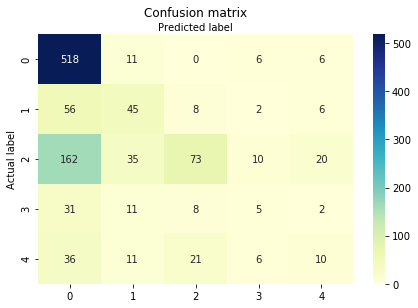

In [ ]:
class_names=[0,1,2,3,4] # name  of classes
cnf_matrix=confusion_matrix(y_test, y_pred,class_names)

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))


# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")

ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names)

plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

**Random Search--Tuning Random Forest**

In [ ]:
#create a dictionary of parameters 
param_grid = {'n_estimators':np.arange(50, 1000, 50),
'max_features':[2,4,6],
'max_depth':[6, 8, 10, 12,14]}

# create Random Forest model 
rf_obj=RandomForestClassifier(random_state = SEED)

# Create gridsearch object with various combinations of parameters
rf_Grid = RandomizedSearchCV(rf_obj, param_grid, cv = 5,
                       scoring = 'roc_auc_ovr', refit = True,
                       n_jobs=-1, verbose = 5)


In [ ]:
rf_Grid.fit(X_train_pca_s, y_train_s)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   32.6s
[Parallel(n_jobs=-1)]: Done  46 out of  50 | elapsed:  2.0min remaining:   10.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.1min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
rf_best = rf_Grid.best_estimator_
y_probCv = rf_best.predict_proba(X_test_pca)
y_predCv = rf_best.predict(X_test_pca)

In [ ]:
print(classification_report(y_test, y_predCv))

              precision    recall  f1-score   support

           0       0.53      0.96      0.69       541
           1       0.39      0.08      0.13       117
           2       0.55      0.18      0.27       300
           3       0.00      0.00      0.00        57
           4       0.00      0.00      0.00        84

    accuracy                           0.53      1099
   macro avg       0.29      0.24      0.22      1099
weighted avg       0.45      0.53      0.43      1099



C:\Users\betty\Anaconda3\envs\keras-gpu\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



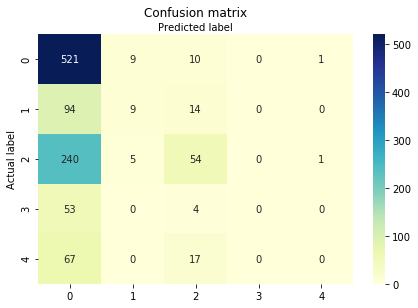

In [ ]:
class_names=[0,1,2,3,4] # name  of classes
cnf_matrix=confusion_matrix(y_test, y_predCv,class_names)

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))


# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")

ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names)

plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
y_predCv_train = rf_best.predict(X_train_pca_s)

In [ ]:
print(classification_report(y_train_s,y_predCv_train))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1264
           1       0.96      1.00      0.98      1264
           2       1.00      0.97      0.99      1264
           3       0.99      1.00      1.00      1264
           4       1.00      0.99      0.99      1264

    accuracy                           0.99      6320
   macro avg       0.99      0.99      0.99      6320
weighted avg       0.99      0.99      0.99      6320



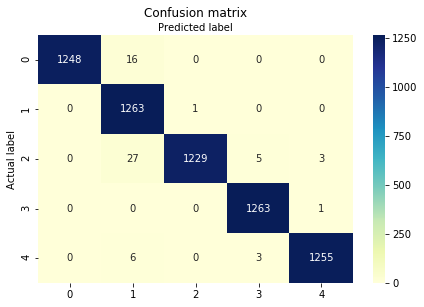

In [ ]:
class_names=[0,1,2,3,4] # name  of classes
cnf_matrix=confusion_matrix(y_train_s,y_predCv_train,class_names)

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))


# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu",fmt='g')
ax.xaxis.set_label_position("top")

ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names)

plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

**ADA Boosting--Random Search**

In [ ]:
#create a dictionary of parameters 
param_grid = {'n_estimators':[50, 100, 200, 300, 400, 500],
'learning_rate' :[0.1, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.5, 2]}

# create Random Forest model 
ADA_obj=AdaBoostClassifier(random_state = 0)

# Create gridsearch object with various combinations of parameters
ADA_Grid = RandomizedSearchCV(ADA_obj, param_grid, cv = 5, 
                        refit = True, scoring = 'roc_auc_ovr', 
                        n_jobs=-1, verbose = 5)

In [ ]:
ADA_Grid.fit(X_train_pca_s, y_train_s)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  46 out of  50 | elapsed: 29.3min remaining:  2.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 29.4min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                base_estimator=None,
                                                learning_rate=1.0,
                                                n_estimators=50,
                                                random_state=0),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.2, 0.4, 0.6,
                                                          0.8, 1, 1.2, 1.5, 2],
                                        'n_estimators': [50, 100, 200, 300, 400,
                                                         500]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='roc_auc_ovr', verbose=5)

In [ ]:
ADA_best = ADA_Grid.best_estimator_

In [ ]:
y_probXG = ADA_Grid.predict_proba(X_test_pca)
y_predXG = ADA_Grid.predict(X_test_pca)
print(classification_report(y_test, y_predXG))

              precision    recall  f1-score   support

           0       0.90      0.61      0.73       541
           1       0.33      0.31      0.32       117
           2       0.44      0.64      0.52       300
           3       0.07      0.12      0.09        57
           4       0.06      0.06      0.06        84

    accuracy                           0.52      1099
   macro avg       0.36      0.35      0.34      1099
weighted avg       0.61      0.52      0.54      1099



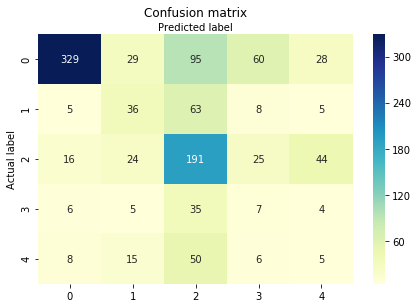

In [ ]:
class_names=[0,1,2,3,4] # name  of classes
cnf_matrix=confusion_matrix(y_test, y_predXG,class_names)

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))


# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu",fmt='g')
ax.xaxis.set_label_position("top")

ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names)

plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
y_predXG_train = ADA_Grid.predict(X_train_pca_s)
print(classification_report(y_train_s,y_predXG_train))

              precision    recall  f1-score   support

           0       0.89      0.66      0.76      1264
           1       0.73      0.75      0.74      1264
           2       0.49      0.57      0.53      1264
           3       0.70      0.65      0.68      1264
           4       0.59      0.69      0.64      1264

    accuracy                           0.66      6320
   macro avg       0.68      0.66      0.67      6320
weighted avg       0.68      0.66      0.67      6320



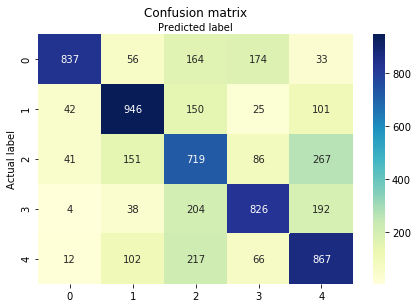

In [ ]:
class_names=[0,1,2,3,4] # name  of classes
cnf_matrix=confusion_matrix(y_train_s,y_predXG_train,class_names)

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))


# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu",fmt='g')
ax.xaxis.set_label_position("top")

ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names)

plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

### 3.2 Transfer Learning

**What is a Pre-trained Model?**   
A pre-trained model has been previously trained on a dataset and contains the weights and biases that represent the features of whichever dataset it was trained on. Learned features are often transferable to different data. For example, a model trained on a large dataset of bird images will contain learned features like edges or horizontal lines that you would be transferable your dataset.   

**Why use a Pre-trained Model?**   
Pre-trained models are beneficial to us for many reasons. By using a pre-trained model you are saving time. Someone else has already spent the time and compute resources to learn a lot of features and your model will likely benefit from it.

In [14]:
#Import necessary libraries
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dropout, GaussianNoise, GaussianDropout
from keras.layers import (Activation, Dropout, Flatten, Dense, GlobalMaxPooling2D,
                                     MaxPooling2D,SeparableConv2D,BatchNormalization, Input, 
                                     Conv2D, GlobalAveragePooling2D)
from keras.applications.resnet50 import ResNet50
from keras.callbacks import ModelCheckpoint
from keras import metrics
from keras.optimizers import Adam 
from keras import backend as K
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import Sequence

In [15]:
# Model parameters
BATCH_SIZE = 24
EPOCHS = 30
WARMUP_EPOCHS = 5
LEARNING_RATE = 1e-4
WARMUP_LEARNING_RATE = 1e-3
HEIGHT = 225
WIDTH = 225
CANAL = 3
N_CLASSES = df_train['diagnosis'].nunique()
ES_PATIENCE = 5
RLROP_PATIENCE = 3
DECAY_DROP = 0.5

**Split into train and test dataset**

In [16]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(df_train['diagnosis'], num_classes=5)
#y = df_train['diagnosis']

In [17]:
print(X.shape)
print(y.shape)

(3662, 225, 225, 3)
(3662, 5)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=SEED)

In [19]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2929, 225, 225, 3)
(2929, 5)
(733, 225, 225, 3)
(733, 5)


**Data Augmentation**

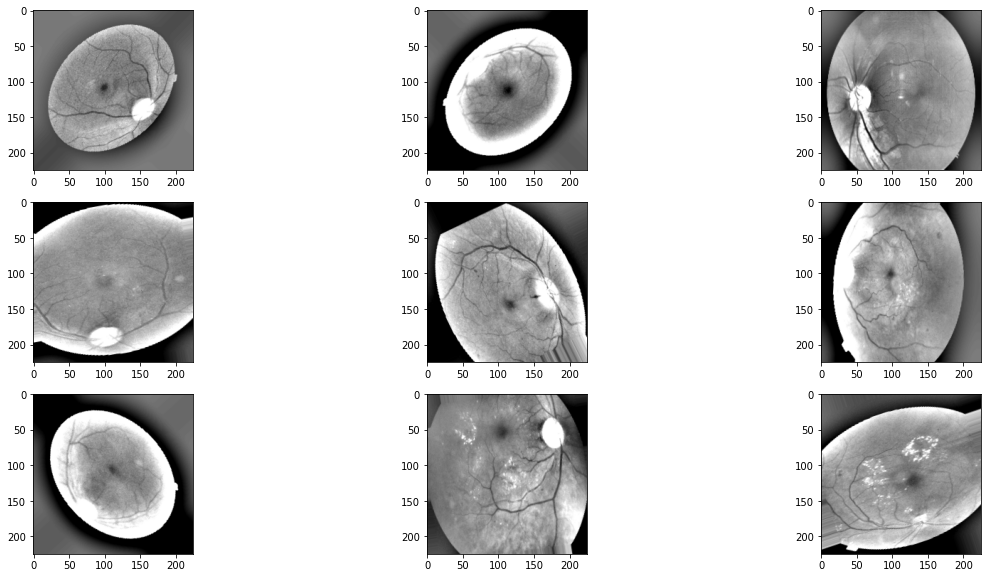

In [20]:
import matplotlib.pyplot as pyplot
# Random Rotations
plt.figure(figsize=(20,10))
datagen = ImageDataGenerator(rotation_range=180,
                            horizontal_flip=True,
                            vertical_flip=True)

# fit parameters from data
datagen.fit(X_train)

# Configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    # Show 9 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow((X_batch[i].reshape(225, 225, 3).astype('uint8')))
    # show the plot
    pyplot.show()
    break

In [21]:
# Add Image augmentation to our generator
train_datagen = ImageDataGenerator(rotation_range=180,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   rescale =1./128,
                                  validation_split=0.20)
#train_datagen.fit(X_train)

In [22]:
train_generator=train_datagen.flow(X_train,y_train, batch_size =BATCH_SIZE,subset='training',seed=SEED)
valid_generator= train_datagen.flow(X_train, y_train,batch_size=BATCH_SIZE,subset='validation',seed=SEED)

**ResNet50**

<img src="resnet50.png">

The ResNet-50 model consists of 5 stages each with a convolution and Identity block. Each convolution block has 3 convolution layers and each identity block also has 3 convolution layers. The ResNet-50 has over 23 million trainable parameters.

In [24]:
def create_model(input_shape, n_out):
    input_tensor = Input(shape=input_shape)
    base_model = ResNet50(include_top=False,
                   weights='imagenet',
                   input_tensor=input_tensor)
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dropout(0.5)(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)
    #dense 
    final_output = Dense(n_out, activation="softmax", name='final_output')(x)
    model = Model(input_tensor, final_output)
    
    return model

In [25]:
model = create_model(
    input_shape=(IMG_SIZE,IMG_SIZE,3), 
    n_out=NUM_CLASSES)

94773248/94765736 [==============================] - 2s 0us/step


**Train top layers**

In [26]:
from sklearn.utils import class_weight
from keras.callbacks import ReduceLROnPlateau

In [27]:
for layer in model.layers:
    layer.trainable = False

for i in range(-5, 0):
    model.layers[i].trainable = True
    
class_weights = class_weight.compute_class_weight('balanced', np.unique(df_train['diagnosis'].astype('int').values), df_train['diagnosis'].astype('int').values)

metric_list = ["accuracy"]
optimizer = Adam(lr=WARMUP_LEARNING_RATE)
model.compile(optimizer=optimizer, loss='categorical_crossentropy',  metrics=metric_list)
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 225, 225, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 231, 231, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 113, 113, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 113, 113, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [31]:

dict(zip(np.unique(df_train['diagnosis'].astype('int').values),class_weights))

{0: 0.4057617728531856,
 1: 1.9794594594594594,
 2: 0.7331331331331331,
 3: 3.7948186528497407,
 4: 2.4827118644067796}

In [32]:
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = valid_generator.n//valid_generator.batch_size

history_warmup = model.fit_generator(generator=train_generator,
                                     steps_per_epoch=STEP_SIZE_TRAIN,
                                     validation_data=valid_generator,
                                     validation_steps=STEP_SIZE_VALID,
                                     epochs=WARMUP_EPOCHS,
                                     class_weight=dict(zip(np.unique(df_train['diagnosis'].astype('int').values),class_weights)),
                                     verbose=1).history

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
97/97 [==============================] - 32s 332ms/step - loss: 2.1785 - accuracy: 0.3177 - val_loss: 1.1767 - val_accuracy: 0.5382
Epoch 2/5
97/97 [==============================] - 31s 321ms/step - loss: 1.5983 - accuracy: 0.4207 - val_loss: 1.4463 - val_accuracy: 0.3767
Epoch 3/5
97/97 [==============================] - 31s 321ms/step - loss: 1.4919 - accuracy: 0.4616 - val_loss: 1.1811 - val_accuracy: 0.4635
Epoch 4/5
97/97 [==============================] - 31s 322ms/step - loss: 1.4491 - accuracy: 0.4746 - val_loss: 1.1057 - val_accuracy: 0.5347
Epoch 5/5
97/97 [==============================] - 31s 322ms/step - loss: 1.4079 - accuracy: 0.4884 - val_loss: 1.0688 - val_accuracy: 0.5312


**Tuning the complete model**

ReduceLROnPlateau: Reduce learning rate when a metric has stopped improving.    
EarlyStopping:Stop training when a monitored quantity has stopped improving.   
   
Callback: A callback is a set of functions to be applied at given stages of the training procedure. You can use callbacks to get a view on internal states and statistics of the model during training. You can pass a list of callbacks (as the keyword argument callbacks) to the .fit() method of the Sequential or Model classes. The relevant methods of the callbacks will then be called at each stage of the training.    

In [33]:
for layer in model.layers:
    layer.trainable = True

es = EarlyStopping(monitor='val_loss', mode='min', patience=ES_PATIENCE, restore_best_weights=True, verbose=1)
rlrop = ReduceLROnPlateau(monitor='val_loss', mode='min', patience=RLROP_PATIENCE, factor=DECAY_DROP, min_lr=1e-6, verbose=1)
callback_list = [es, rlrop]
optimizer = Adam(lr=LEARNING_RATE)
model.compile(optimizer=optimizer, loss='categorical_crossentropy',  metrics=metric_list)
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 225, 225, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 231, 231, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 113, 113, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 113, 113, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [34]:
history_finetunning = model.fit_generator(generator=train_generator,
                                          steps_per_epoch=STEP_SIZE_TRAIN,
                                          validation_data=valid_generator,
                                          validation_steps=STEP_SIZE_VALID,
                                          epochs=EPOCHS,
                                          callbacks=callback_list,
                                          class_weight=dict(zip(np.unique(df_train['diagnosis'].astype('int').values),class_weights)),
                                          verbose=1).history

Epoch 1/30
97/97 [==============================] - 33s 338ms/step - loss: 1.5028 - accuracy: 0.5711 - val_loss: 1.5725 - val_accuracy: 0.5208
Epoch 2/30
97/97 [==============================] - 31s 321ms/step - loss: 1.1514 - accuracy: 0.6073 - val_loss: 6.4045 - val_accuracy: 0.1024
Epoch 3/30
97/97 [==============================] - 31s 318ms/step - loss: 1.0753 - accuracy: 0.6504 - val_loss: 1.8818 - val_accuracy: 0.2483
Epoch 4/30
97/97 [==============================] - ETA: 0s - loss: 1.1266 - accuracy: 0.6470
Epoch 00004: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
97/97 [==============================] - 31s 319ms/step - loss: 1.1266 - accuracy: 0.6470 - val_loss: 7.0398 - val_accuracy: 0.0990
Epoch 5/30
97/97 [==============================] - 31s 318ms/step - loss: 0.9590 - accuracy: 0.6944 - val_loss: 2.5247 - val_accuracy: 0.3003
Epoch 6/30
97/97 [==============================] - 31s 322ms/step - loss: 0.8966 - accuracy: 0.7139 - val_loss: 1.4452 - 

**Loss & Accuarcy graph: Train & Validation**

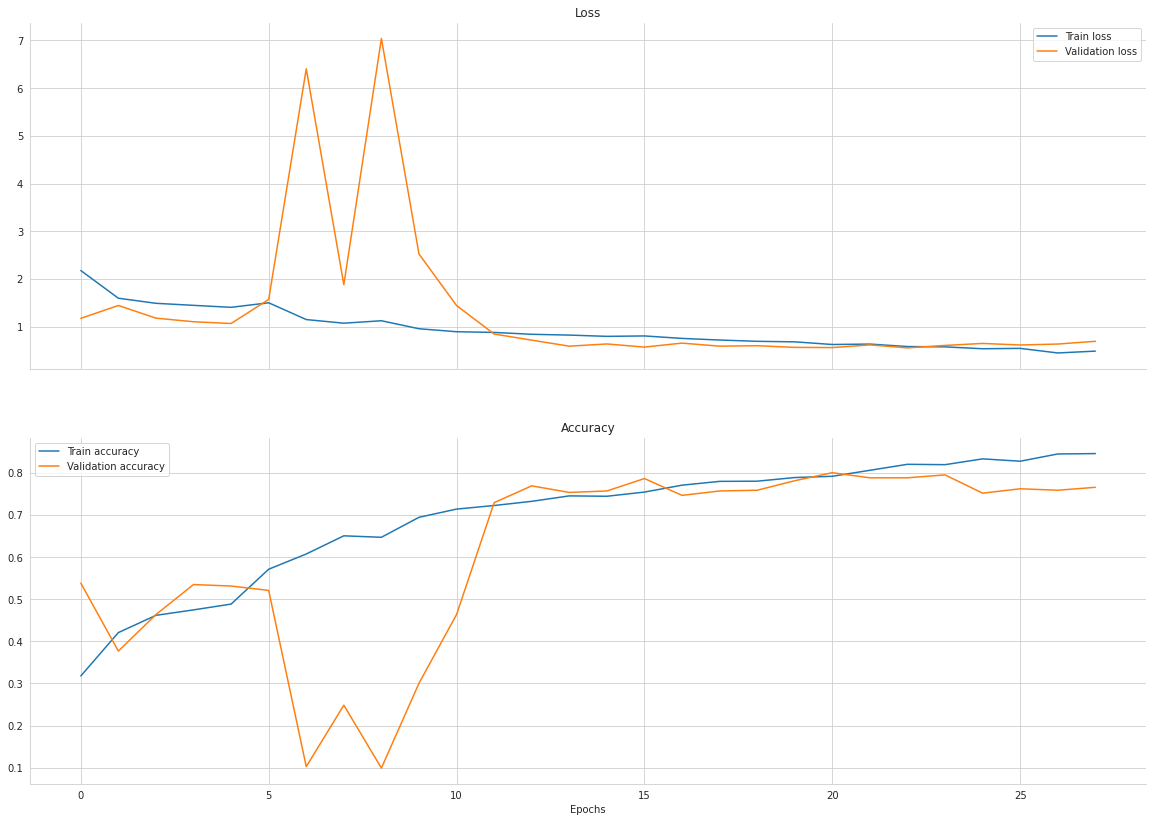

In [35]:
history = {'loss': history_warmup['loss'] + history_finetunning['loss'], 
           'val_loss': history_warmup['val_loss'] + history_finetunning['val_loss'], 
           'acc': history_warmup['accuracy'] + history_finetunning['accuracy'], 
           'val_acc': history_warmup['val_accuracy'] + history_finetunning['val_accuracy']}

sns.set_style("whitegrid")
fig, (ax1, ax2) = plt.subplots(2, 1, sharex='col', figsize=(20, 14))

ax1.plot(history['loss'], label='Train loss')
ax1.plot(history['val_loss'], label='Validation loss')
ax1.legend(loc='best')
ax1.set_title('Loss')

ax2.plot(history['acc'], label='Train accuracy')
ax2.plot(history['val_acc'], label='Validation accuracy')
ax2.legend(loc='best')
ax2.set_title('Accuracy')

plt.xlabel('Epochs')
sns.despine()
plt.show()

**Evaluate result using test dataset**

In [36]:
test_generator= train_datagen.flow(X_test, y_test,batch_size=BATCH_SIZE,seed=SEED)

In [37]:
STEP_SIZE_TEST = test_generator.n//test_generator.batch_size

In [38]:
model.evaluate(test_generator,steps=STEP_SIZE_TEST)

30/30 [==============================] - 7s 245ms/step - loss: 0.5368 - accuracy: 0.7931


[0.5368282198905945, 0.793055534362793]

**Visualize Result**

In [39]:
# Create empty arays to keep the predictions and labels
lastFullTrainPred = np.empty((0, N_CLASSES))
lastFullTrainLabels = np.empty((0, N_CLASSES))
lastFulltestPred = np.empty((0, N_CLASSES))
lastFulltestLabels = np.empty((0, N_CLASSES))

# Add train predictions and labels
for i in range(STEP_SIZE_TRAIN+1):
    im, lbl = next(train_generator)
    scores = model.predict(im, batch_size=train_generator.batch_size)
    lastFullTrainPred = np.append(lastFullTrainPred, scores, axis=0)
    lastFullTrainLabels = np.append(lastFullTrainLabels, lbl, axis=0)

# Add validation predictions and labels
for i in range(STEP_SIZE_TEST+1):
    im, lbl = next(test_generator)
    scores = model.predict(im, batch_size=test_generator.batch_size)
    lastFulltestPred = np.append(lastFulltestPred, scores, axis=0)
    lastFulltestLabels = np.append(lastFulltestLabels, lbl, axis=0)
    
    
lastFullComPred = np.concatenate((lastFullTrainPred, lastFulltestPred))
lastFullComLabels = np.concatenate((lastFullTrainLabels, lastFulltestLabels))
complete_labels = [np.argmax(label) for label in lastFullComLabels]

train_preds = [np.argmax(pred) for pred in lastFullTrainPred]
train_labels = [np.argmax(label) for label in lastFullTrainLabels]
test_preds = [np.argmax(pred) for pred in lastFulltestPred]
test_labels = [np.argmax(label) for label in lastFulltestLabels]

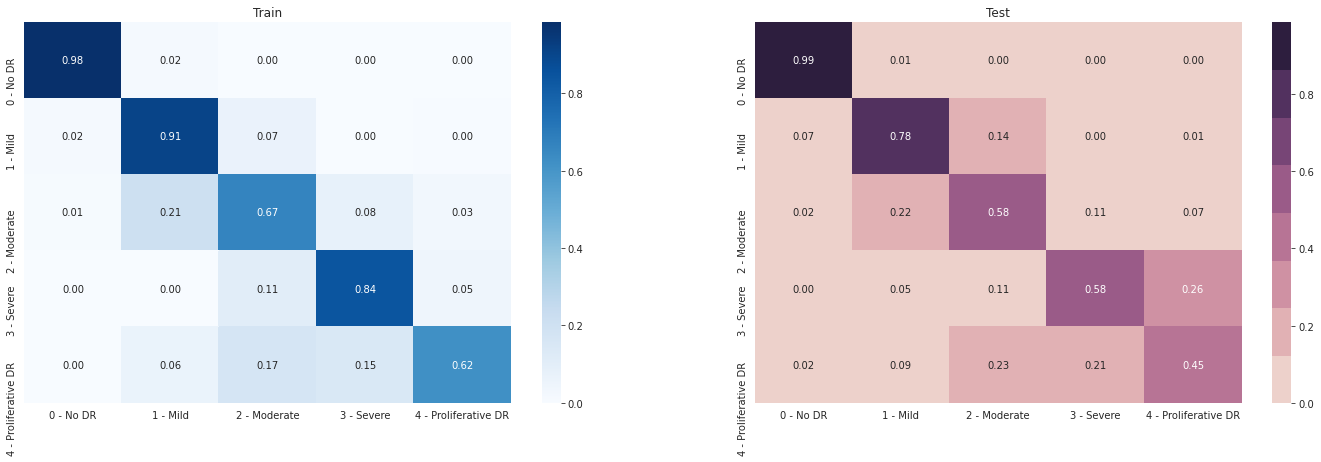

In [40]:
from sklearn.metrics import confusion_matrix
fig, (ax1, ax2) = plt.subplots(1, 2, sharex='col', figsize=(24, 7))
labels = ['0 - No DR', '1 - Mild', '2 - Moderate', '3 - Severe', '4 - Proliferative DR']
train_cnf_matrix = confusion_matrix(train_labels, train_preds)
test_cnf_matrix = confusion_matrix(test_labels, test_preds)

train_cnf_matrix_norm = train_cnf_matrix.astype('float') / train_cnf_matrix.sum(axis=1)[:, np.newaxis]
test_cnf_matrix_norm = test_cnf_matrix.astype('float') / test_cnf_matrix.sum(axis=1)[:, np.newaxis]

train_df_cm = pd.DataFrame(train_cnf_matrix_norm, index=labels, columns=labels)
test_df_cm = pd.DataFrame(test_cnf_matrix_norm, index=labels, columns=labels)

sns.heatmap(train_df_cm, annot=True, fmt='.2f', cmap="Blues", ax=ax1).set_title('Train')
sns.heatmap(test_df_cm, annot=True, fmt='.2f', cmap=sns.cubehelix_palette(8), ax=ax2).set_title('Test')
plt.show()

**EfficientNetB5**

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [42]:
BATCH_SIZE = 24

# Add Image augmentation to our generator
train_datagen = ImageDataGenerator(rotation_range=360,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   validation_split=0.15,
                                   rescale= 1/ 128.)

# Use the dataframe to define train and validation generators
#train_generator = train_datagen.flow(X_train, y_train, batch_size = BATCH_SIZE)
#val_datagen = ImageDataGenerator(rescale = 1./128)
#val_generator = val_datagen.flow(X_test, y_test,batch_size=BATCH_SIZE)

In [43]:
train_generator=train_datagen.flow(X_train,y_train, batch_size =BATCH_SIZE,subset='training',seed=SEED)
val_generator= train_datagen.flow(X_train, y_train,batch_size=BATCH_SIZE,subset='validation',seed=SEED)

In [45]:
#!pip install efficientnet

     |████████████████████████████████| 51kB 3.0MB/s 


In [46]:
from efficientnet.tfkeras import EfficientNetB0

In [47]:
effnet = EfficientNetB0(weights='imagenet',
                        include_top=False,
                        input_shape=(225, 225, 3))

16809984/16804768 [==============================] - 1s 0us/step


In [48]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau

In [49]:
def create_model(input_shape, n_out):
    input_tensor = Input(shape=input_shape)
    base_model = EfficientNetB0(weights='imagenet',
                        include_top=False,
                        input_tensor=input_tensor)
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dropout(0.5)(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)
    #dense 
    final_output = Dense(n_out, activation="softmax", name='final_output')(x)
    model = Model(input_tensor, final_output)
    
    return model

In [50]:
SEED =3
IMG_SIZE = 225
NUM_CLASSES =5
model = create_model(
    input_shape=(IMG_SIZE,IMG_SIZE,3), 
    n_out=NUM_CLASSES)

In [51]:
from sklearn.utils import class_weight
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [52]:
for layer in model.layers:
    layer.trainable = False

for i in range(-5, 0):
    model.layers[i].trainable = True
    
class_weights = class_weight.compute_class_weight('balanced', np.unique(df_train['diagnosis'].astype('int').values), df_train['diagnosis'].astype('int').values)

metric_list = ["accuracy"]
optimizer = Adam(lr=WARMUP_LEARNING_RATE)
model.compile(optimizer=optimizer, loss='categorical_crossentropy',  metrics=metric_list)
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 225, 225, 3) 0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 113, 113, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 113, 113, 32) 128         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, 113, 113, 32) 0           stem_bn[0][0]                    
_______________________________________________________________________________________

In [53]:
class_weights

array([0.40576177, 1.97945946, 0.73313313, 3.79481865, 2.48271186])

In [54]:
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = val_generator.n//val_generator.batch_size

history_warmup = model.fit_generator(generator=train_generator,
                                     steps_per_epoch=STEP_SIZE_TRAIN,
                                     validation_data=val_generator,
                                     validation_steps=STEP_SIZE_VALID,
                                     epochs=WARMUP_EPOCHS,
                                     class_weight=dict(zip(np.unique(df_train['diagnosis'].astype('int').values),class_weights)),
                                     verbose=1).history

Epoch 1/5
103/103 [==============================] - 32s 308ms/step - loss: 1.4413 - accuracy: 0.5333 - val_loss: 0.6894 - val_accuracy: 0.7361
Epoch 2/5
103/103 [==============================] - 31s 296ms/step - loss: 1.2240 - accuracy: 0.6115 - val_loss: 0.8250 - val_accuracy: 0.6204
Epoch 3/5
103/103 [==============================] - 31s 296ms/step - loss: 1.1271 - accuracy: 0.6180 - val_loss: 0.7948 - val_accuracy: 0.6343
Epoch 4/5
103/103 [==============================] - 31s 296ms/step - loss: 1.1222 - accuracy: 0.6265 - val_loss: 0.7920 - val_accuracy: 0.6690
Epoch 5/5
103/103 [==============================] - 31s 297ms/step - loss: 1.0843 - accuracy: 0.6427 - val_loss: 0.7241 - val_accuracy: 0.6782


In [55]:
for layer in model.layers:
    layer.trainable = True

es = EarlyStopping(monitor='val_loss', mode='min', patience=ES_PATIENCE, restore_best_weights=True, verbose=1)
rlrop = ReduceLROnPlateau(monitor='val_loss', mode='min',
                          patience=RLROP_PATIENCE, factor=DECAY_DROP, 
                          min_lr=1e-6, verbose=1)
callback_list = [es, rlrop]
optimizer = Adam(lr=LEARNING_RATE)
model.compile(optimizer=optimizer, loss='categorical_crossentropy',  metrics=metric_list)
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 225, 225, 3) 0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 113, 113, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 113, 113, 32) 128         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, 113, 113, 32) 0           stem_bn[0][0]                    
_______________________________________________________________________________________

In [56]:
class_weights

array([0.40576177, 1.97945946, 0.73313313, 3.79481865, 2.48271186])

In [57]:
history_finetunning = model.fit_generator(generator=train_generator,
                                          steps_per_epoch=STEP_SIZE_TRAIN,
                                          validation_data=val_generator,
                                          validation_steps=STEP_SIZE_VALID,
                                          epochs=EPOCHS,
                                          callbacks=callback_list,
                                          #class_weight=class_weights,
                                          verbose=1).history

Epoch 1/30
103/103 [==============================] - 33s 320ms/step - loss: 0.8316 - accuracy: 0.6906 - val_loss: 0.7245 - val_accuracy: 0.7269
Epoch 2/30
103/103 [==============================] - 32s 311ms/step - loss: 0.6894 - accuracy: 0.7470 - val_loss: 0.6997 - val_accuracy: 0.7500
Epoch 3/30
103/103 [==============================] - 32s 309ms/step - loss: 0.6023 - accuracy: 0.7729 - val_loss: 0.6263 - val_accuracy: 0.7569
Epoch 4/30
103/103 [==============================] - 32s 309ms/step - loss: 0.5748 - accuracy: 0.7766 - val_loss: 0.5431 - val_accuracy: 0.7986
Epoch 5/30
103/103 [==============================] - 32s 306ms/step - loss: 0.5360 - accuracy: 0.7968 - val_loss: 0.5375 - val_accuracy: 0.7708
Epoch 6/30
103/103 [==============================] - 32s 307ms/step - loss: 0.5226 - accuracy: 0.8038 - val_loss: 0.5172 - val_accuracy: 0.7963
Epoch 7/30
103/103 [==============================] - 32s 306ms/step - loss: 0.4885 - accuracy: 0.8135 - val_loss: 0.4857 - val_ac

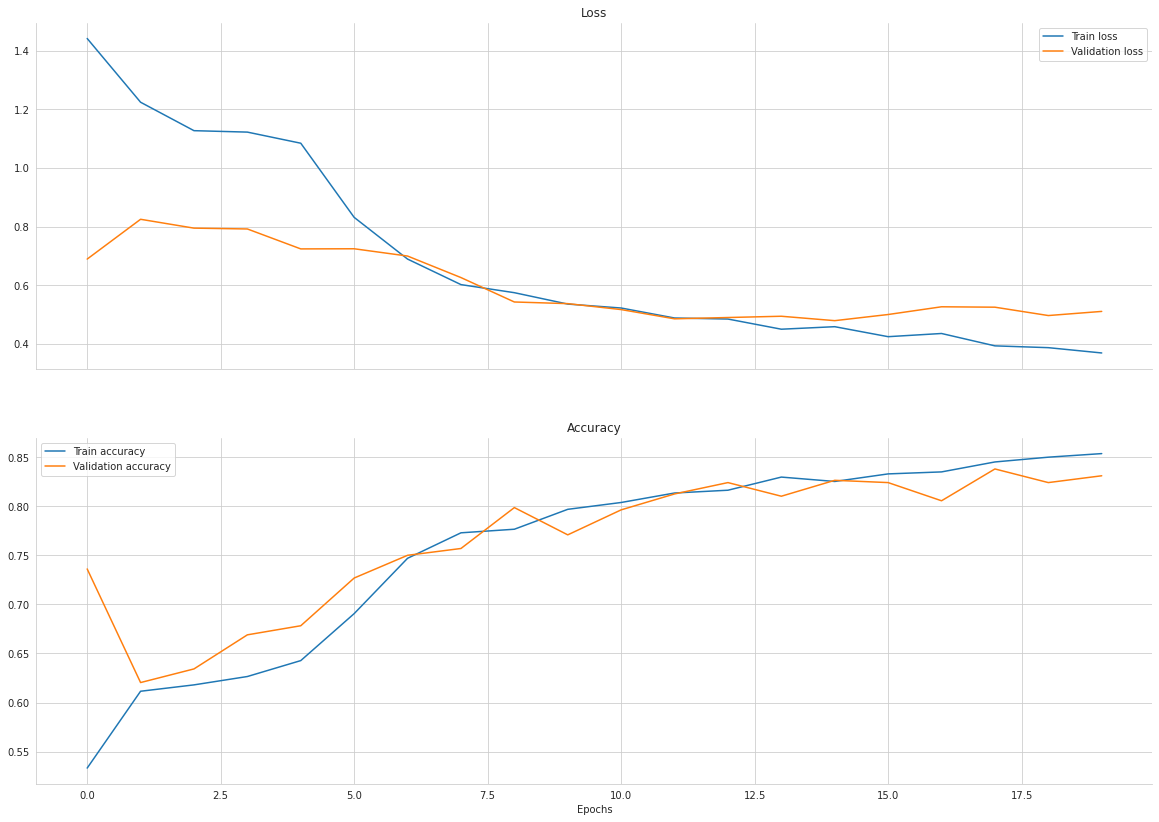

In [62]:
history = {'loss': history_warmup['loss'] + history_finetunning['loss'], 
           'val_loss': history_warmup['val_loss'] + history_finetunning['val_loss'], 
           'accuracy': history_warmup['accuracy'] + history_finetunning['accuracy'], 
           'val_accuracy': history_warmup['val_accuracy'] + history_finetunning['val_accuracy']}

sns.set_style("whitegrid")
fig, (ax1, ax2) = plt.subplots(2, 1, sharex='col', figsize=(20, 14))

ax1.plot(history['loss'], label='Train loss')
ax1.plot(history['val_loss'], label='Validation loss')
ax1.legend(loc='best')
ax1.set_title('Loss')

ax2.plot(history['accuracy'], label='Train accuracy')
ax2.plot(history['val_accuracy'], label='Validation accuracy')
ax2.legend(loc='best')
ax2.set_title('Accuracy')

plt.xlabel('Epochs')
sns.despine()
plt.show()

In [63]:
test_generator= train_datagen.flow(X_test, y_test,batch_size=BATCH_SIZE,seed=SEED)

In [64]:
model.evaluate(test_generator)

31/31 [==============================] - 8s 245ms/step - loss: 0.4689 - accuracy: 0.8281


[0.4689222276210785, 0.8281036615371704]

In [65]:
# Create empty arays to keep the predictions and labels
lastFullTrainPred = np.empty((0, N_CLASSES))
lastFullTrainLabels = np.empty((0, N_CLASSES))
lastFullValPred = np.empty((0, N_CLASSES))
lastFullValLabels = np.empty((0, N_CLASSES))

# Add train predictions and labels
for i in range(STEP_SIZE_TRAIN+1):
    im, lbl = next(train_generator)
    scores = model.predict(im, batch_size=train_generator.batch_size)
    lastFullTrainPred = np.append(lastFullTrainPred, scores, axis=0)
    lastFullTrainLabels = np.append(lastFullTrainLabels, lbl, axis=0)

# Add validation predictions and labels
for i in range(STEP_SIZE_VALID+1):
    im, lbl = next(val_generator)
    scores = model.predict(im, batch_size=val_generator.batch_size)
    lastFullValPred = np.append(lastFullValPred, scores, axis=0)
    lastFullValLabels = np.append(lastFullValLabels, lbl, axis=0)
    
    
lastFullComPred = np.concatenate((lastFullTrainPred, lastFullValPred))
lastFullComLabels = np.concatenate((lastFullTrainLabels, lastFullValLabels))
complete_labels = [np.argmax(label) for label in lastFullComLabels]

train_preds = [np.argmax(pred) for pred in lastFullTrainPred]
train_labels = [np.argmax(label) for label in lastFullTrainLabels]
validation_preds = [np.argmax(pred) for pred in lastFullValPred]
validation_labels = [np.argmax(label) for label in lastFullValLabels]

Text(0.5, 1.0, 'Validation')

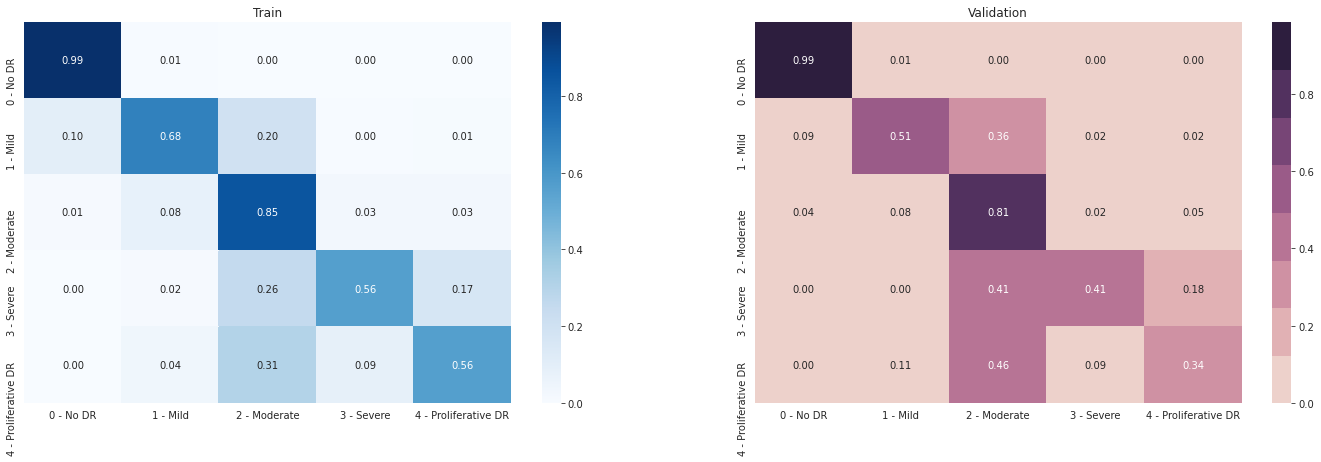

In [66]:
from sklearn.metrics import confusion_matrix
fig, (ax1, ax2) = plt.subplots(1, 2, sharex='col', figsize=(24, 7))
labels = ['0 - No DR', '1 - Mild', '2 - Moderate', '3 - Severe', '4 - Proliferative DR']
train_cnf_matrix = confusion_matrix(train_labels, train_preds)
validation_cnf_matrix = confusion_matrix(validation_labels, validation_preds)

train_cnf_matrix_norm = train_cnf_matrix.astype('float') / train_cnf_matrix.sum(axis=1)[:, np.newaxis]
validation_cnf_matrix_norm = validation_cnf_matrix.astype('float') / validation_cnf_matrix.sum(axis=1)[:, np.newaxis]

train_df_cm = pd.DataFrame(train_cnf_matrix_norm, index=labels, columns=labels)
validation_df_cm = pd.DataFrame(validation_cnf_matrix_norm, index=labels, columns=labels)

sns.heatmap(train_df_cm, annot=True, fmt='.2f', cmap="Blues", ax=ax1).set_title('Train')
sns.heatmap(validation_df_cm, annot=True, fmt='.2f', cmap=sns.cubehelix_palette(8), ax=ax2).set_title('Validation')

### 3.3 Convolutional Neural Network & Classification 

**Basic CNN Model**

**Build the model**

In [ ]:
# build the model
model = Sequential()
    # number of filters to convolve with input volumne
    # number of filters conv layer will learn
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', 
                 input_shape = (225,225,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (6,6), activation='relu'))
model.add(Dropout(0.5))
   
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 
model.add(Dense(units=128, activation='relu'))
model.add(Conv2D(filters =96, kernel_size = (4,4),padding = 'Same',
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
# long vector of input data
model.add(Dense(units=512))
model.add(Flatten())
model.add(Dense(units=256, activation='relu', 
                    kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(5, activation = "softmax"))    

In [ ]:
# compile model
model.compile(optimizer=Adam(lr=0.001),
              loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 225, 225, 32)      2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 107, 107, 64)      73792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 107, 107, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 107, 107, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 53, 53, 64)        0         
_________________________________________________________________
dense_1 (Dense)              (None, 53, 53, 128)      

**Save the model**

In [ ]:
model_yaml = model.to_yaml()
with open("model1.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)

model.save_weights("model1.h5")
print("Saved model to disk")

Saved model to disk


**Fit the model**

In [ ]:
BATCH_SIZE = 40
EPOCHS = 10

In [ ]:
history = model.fit(X_train, y_train, validation_split =0.2, 
          epochs=EPOCHS, batch_size=BATCH_SIZE)

Train on 2343 samples, validate on 586 samples
Epoch 1/10
2343/2343 [==============================] - ETA: 4:58 - loss: 12.0051 - accuracy: 0.425 - ETA: 4:41 - loss: 1290.3188 - accuracy: 0.300 - ETA: 4:24 - loss: 904.6912 - accuracy: 0.266 - ETA: 4:14 - loss: 721.8370 - accuracy: 0.30 - ETA: 4:09 - loss: 593.9692 - accuracy: 0.24 - ETA: 4:05 - loss: 508.3352 - accuracy: 0.25 - ETA: 4:02 - loss: 439.6101 - accuracy: 0.29 - ETA: 3:57 - loss: 387.3354 - accuracy: 0.31 - ETA: 3:51 - loss: 345.9867 - accuracy: 0.32 - ETA: 3:45 - loss: 312.4179 - accuracy: 0.35 - ETA: 3:39 - loss: 284.8411 - accuracy: 0.37 - ETA: 3:34 - loss: 261.8623 - accuracy: 0.36 - ETA: 3:29 - loss: 242.3605 - accuracy: 0.36 - ETA: 3:24 - loss: 225.6420 - accuracy: 0.38 - ETA: 3:19 - loss: 211.1639 - accuracy: 0.40 - ETA: 3:14 - loss: 198.5116 - accuracy: 0.42 - ETA: 3:10 - loss: 187.3451 - accuracy: 0.43 - ETA: 3:07 - loss: 177.4478 - accuracy: 0.43 - ETA: 3:03 - loss: 168.6059 - accuracy: 0.44 - ETA: 2:59 - loss: 16

Epoch 4/10
2343/2343 [==============================] - ETA: 5:18 - loss: 7.6409 - accuracy: 0.70 - ETA: 4:54 - loss: 7.5939 - accuracy: 0.72 - ETA: 4:32 - loss: 7.6136 - accuracy: 0.70 - ETA: 4:19 - loss: 7.5444 - accuracy: 0.72 - ETA: 4:10 - loss: 7.5538 - accuracy: 0.71 - ETA: 4:03 - loss: 7.5240 - accuracy: 0.72 - ETA: 3:56 - loss: 7.5900 - accuracy: 0.69 - ETA: 3:51 - loss: 7.5504 - accuracy: 0.71 - ETA: 3:46 - loss: 7.5640 - accuracy: 0.70 - ETA: 3:40 - loss: 7.5486 - accuracy: 0.70 - ETA: 3:35 - loss: 7.5340 - accuracy: 0.70 - ETA: 3:29 - loss: 7.5251 - accuracy: 0.70 - ETA: 3:25 - loss: 7.5257 - accuracy: 0.69 - ETA: 3:20 - loss: 7.5259 - accuracy: 0.69 - ETA: 3:15 - loss: 7.5204 - accuracy: 0.70 - ETA: 3:10 - loss: 7.5257 - accuracy: 0.69 - ETA: 3:05 - loss: 7.5117 - accuracy: 0.70 - ETA: 3:01 - loss: 7.4932 - accuracy: 0.70 - ETA: 2:56 - loss: 7.4886 - accuracy: 0.70 - ETA: 2:52 - loss: 7.4799 - accuracy: 0.70 - ETA: 2:47 - loss: 7.4700 - accuracy: 0.70 - ETA: 2:43 - loss: 7.

2343/2343 [==============================] - ETA: 4:06 - loss: 4.1339 - accuracy: 0.55 - ETA: 4:07 - loss: 3.9057 - accuracy: 0.66 - ETA: 4:01 - loss: 3.8787 - accuracy: 0.66 - ETA: 3:57 - loss: 3.9266 - accuracy: 0.67 - ETA: 3:55 - loss: 3.8776 - accuracy: 0.69 - ETA: 3:51 - loss: 3.9446 - accuracy: 0.67 - ETA: 3:46 - loss: 3.9110 - accuracy: 0.68 - ETA: 3:41 - loss: 3.9128 - accuracy: 0.69 - ETA: 3:37 - loss: 3.8983 - accuracy: 0.69 - ETA: 3:33 - loss: 3.8811 - accuracy: 0.70 - ETA: 3:29 - loss: 3.8724 - accuracy: 0.70 - ETA: 3:24 - loss: 3.8572 - accuracy: 0.70 - ETA: 3:20 - loss: 3.8669 - accuracy: 0.70 - ETA: 3:16 - loss: 3.8652 - accuracy: 0.70 - ETA: 3:12 - loss: 3.8713 - accuracy: 0.69 - ETA: 3:07 - loss: 3.8733 - accuracy: 0.69 - ETA: 3:03 - loss: 3.8794 - accuracy: 0.69 - ETA: 2:58 - loss: 3.8746 - accuracy: 0.69 - ETA: 2:54 - loss: 3.8883 - accuracy: 0.68 - ETA: 2:50 - loss: 3.8931 - accuracy: 0.68 - ETA: 2:46 - loss: 3.8862 - accuracy: 0.69 - ETA: 2:41 - loss: 3.8803 - accu

**Loss vs Accuracy**

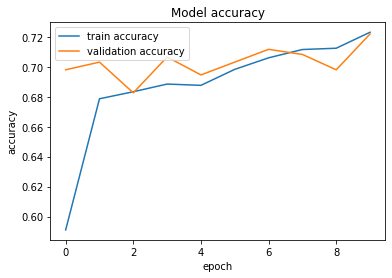

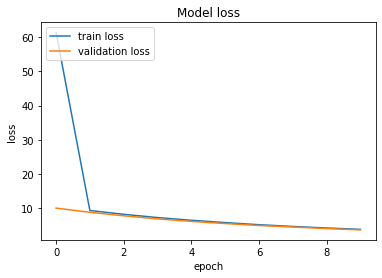

In [ ]:
# summarize history for accuracy
plt.subplot(1,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'validation accuracy'], loc='upper left')
plt.show()

# summarize history for loss
plt.subplot(1,1,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper left')
plt.show()

**Evaluate the model**

In [ ]:
model.evaluate(X_test, y_test, batch_size = BATCH_SIZE)

733/733 [==============================] - ETA: 16 - ETA: 15 - ETA: 14 - ETA: 13 - ETA: 12 - ETA: 11 - ETA: 10 - ETA: 9 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 17s 24ms/step


[3.538994176325987, 0.7366985082626343]

**Load the model**

In [ ]:
from keras.models import Sequential, load_model, clone_model
import os, glob
import numpy as np
from keras.models import model_from_yaml
from keras.preprocessing import image

In [ ]:
# load model from disk
yaml_file = open('model1.yaml', 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()
model = model_from_yaml(loaded_model_yaml)
# load weights into new model
model.load_weights("model1.h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:
from keras import regularizers, optimizers

**3.3.2 Add Data Augmentation+Tunning**

**Build the model**

In [ ]:
# build the model
model2 = Sequential()
    # number of filters to convolve with input volumne
    # number of filters conv layer will learn
model2.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', 
                 input_shape = (225,225,3)))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Conv2D(filters = 64, kernel_size = (6,6), activation='relu'))
model2.add(Dropout(0.5))
   
model2.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model2.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 
model2.add(Dense(units=128, activation='relu'))
model2.add(Conv2D(filters =96, kernel_size = (4,4),padding = 'Same',
                 activation ='relu'))
model2.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model2.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model2.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
# long vector of input data
model2.add(Dense(units=512))
model2.add(Flatten())
model2.add(Dense(units=256, activation='relu', 
                    kernel_regularizer=regularizers.l2(0.01)))
model2.add(Dense(5, activation = "softmax"))    

In [ ]:
# compile model
model2.compile(optimizer=Adam(lr=0.001),
              loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 225, 225, 32)      2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 107, 107, 64)      73792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 107, 107, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 107, 107, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 53, 53, 64)        0         
_________________________________________________________________
dense_1 (Dense)              (None, 53, 53, 128)      

**Save model**

In [ ]:
model_yaml = model2.to_yaml()
with open("model2.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)

model2.save_weights("model2.h5")
print("Saved model to disk")

Saved model to disk


**Data Augmentation**

In [ ]:
# data augmentation
aug_gen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.2,  
        height_shift_range=0.2, 
        horizontal_flip=True,  
        vertical_flip=False,
        validation_split=0.2) 

In [ ]:
BATCH_SIZE = 50
EPOCHS = 15
train_generator = aug_gen.flow(X_train,y_train, batch_size=BATCH_SIZE, shuffle= True, subset='training', seed=SEED)
valid_generator = aug_gen.flow(X_train, y_train, batch_size=BATCH_SIZE, shuffle=True, subset='validation', seed=SEED)

**Prevent Overfitting**

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
es= EarlyStopping(monitor='val_loss', mode ='min', 
                  verbose = 1, patience = 20)
mc = ModelCheckpoint('model2.h5', monitor='val_loss', save_best_only = True, 
                     mode ='min', verbose = 1)


**Fit the model**

In [ ]:
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = valid_generator.n//valid_generator.batch_size
CALLBACKS = [es, mc]

In [ ]:
history2 = model2.fit_generator(generator = train_generator,
              steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data = valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs = EPOCHS,
                              verbose = 1,
                   callbacks = CALLBACKS).history

Epoch 1/15
46/46 [==============================] - ETA: 11:01 - loss: 13.4107 - accuracy: 0.30 - ETA: 9:52 - loss: 1210.1758 - accuracy: 0.280 - ETA: 9:03 - loss: 903.3484 - accuracy: 0.206 - ETA: 8:48 - loss: 712.8744 - accuracy: 0.26 - ETA: 8:26 - loss: 588.1190 - accuracy: 0.28 - ETA: 8:11 - loss: 512.5794 - accuracy: 0.27 - ETA: 7:58 - loss: 454.9496 - accuracy: 0.24 - ETA: 7:46 - loss: 405.0112 - accuracy: 0.21 - ETA: 7:26 - loss: 363.6059 - accuracy: 0.25 - ETA: 7:14 - loss: 329.9226 - accuracy: 0.26 - ETA: 7:03 - loss: 301.2853 - accuracy: 0.29 - ETA: 6:52 - loss: 277.0403 - accuracy: 0.30 - ETA: 6:39 - loss: 256.4577 - accuracy: 0.30 - ETA: 6:26 - loss: 238.8239 - accuracy: 0.28 - ETA: 6:14 - loss: 223.5825 - accuracy: 0.27 - ETA: 6:02 - loss: 210.2329 - accuracy: 0.26 - ETA: 5:50 - loss: 198.4791 - accuracy: 0.25 - ETA: 5:38 - loss: 188.0306 - accuracy: 0.25 - ETA: 5:25 - loss: 178.6692 - accuracy: 0.26 - ETA: 5:12 - loss: 170.2475 - accuracy: 0.26 - ETA: 4:59 - loss: 162.638

C:\Users\danie\Anaconda3\lib\site-packages\keras\engine\saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


Epoch 2/15
46/46 [==============================] - ETA: 8:27 - loss: 11.1820 - accuracy: 0.580 - ETA: 8:14 - loss: 11.0657 - accuracy: 0.620 - ETA: 8:01 - loss: 11.0494 - accuracy: 0.606 - ETA: 7:54 - loss: 10.9678 - accuracy: 0.615 - ETA: 7:44 - loss: 10.9372 - accuracy: 0.620 - ETA: 7:34 - loss: 11.0738 - accuracy: 0.596 - ETA: 7:24 - loss: 11.0281 - accuracy: 0.617 - ETA: 7:11 - loss: 11.0030 - accuracy: 0.617 - ETA: 7:01 - loss: 10.9980 - accuracy: 0.604 - ETA: 6:54 - loss: 10.9892 - accuracy: 0.598 - ETA: 6:40 - loss: 10.9720 - accuracy: 0.600 - ETA: 6:27 - loss: 10.9574 - accuracy: 0.600 - ETA: 6:15 - loss: 10.9320 - accuracy: 0.604 - ETA: 6:02 - loss: 10.9293 - accuracy: 0.602 - ETA: 5:50 - loss: 10.9146 - accuracy: 0.609 - ETA: 5:39 - loss: 10.9075 - accuracy: 0.607 - ETA: 5:28 - loss: 10.8934 - accuracy: 0.609 - ETA: 5:16 - loss: 10.8817 - accuracy: 0.607 - ETA: 5:04 - loss: 10.8840 - accuracy: 0.603 - ETA: 4:52 - loss: 10.8764 - accuracy: 0.598 - ETA: 4:41 - loss: 10.8579 - 

46/46 [==============================] - ETA: 10:20 - loss: 5.9461 - accuracy: 0.620 - ETA: 9:28 - loss: 5.9018 - accuracy: 0.610 - ETA: 9:21 - loss: 5.8314 - accuracy: 0.62 - ETA: 8:56 - loss: 5.8387 - accuracy: 0.62 - ETA: 8:36 - loss: 5.8420 - accuracy: 0.62 - ETA: 8:21 - loss: 5.8647 - accuracy: 0.62 - ETA: 8:11 - loss: 5.8700 - accuracy: 0.62 - ETA: 7:57 - loss: 5.8784 - accuracy: 0.62 - ETA: 7:43 - loss: 5.8696 - accuracy: 0.63 - ETA: 7:27 - loss: 5.8530 - accuracy: 0.63 - ETA: 7:17 - loss: 5.8404 - accuracy: 0.63 - ETA: 7:08 - loss: 5.8213 - accuracy: 0.64 - ETA: 6:56 - loss: 5.8138 - accuracy: 0.64 - ETA: 6:43 - loss: 5.8200 - accuracy: 0.64 - ETA: 6:30 - loss: 5.8102 - accuracy: 0.64 - ETA: 6:17 - loss: 5.8187 - accuracy: 0.64 - ETA: 6:05 - loss: 6.1614 - accuracy: 0.63 - ETA: 5:54 - loss: 6.1392 - accuracy: 0.62 - ETA: 5:43 - loss: 6.1199 - accuracy: 0.62 - ETA: 5:31 - loss: 6.1076 - accuracy: 0.62 - ETA: 5:18 - loss: 6.0824 - accuracy: 0.63 - ETA: 5:04 - loss: 6.0691 - accur

46/46 [==============================] - ETA: 9:48 - loss: 3.5986 - accuracy: 0.72 - ETA: 10:30 - loss: 3.4718 - accuracy: 0.740 - ETA: 10:30 - loss: 3.5361 - accuracy: 0.720 - ETA: 10:05 - loss: 3.5689 - accuracy: 0.705 - ETA: 9:53 - loss: 3.5874 - accuracy: 0.680 - ETA: 9:29 - loss: 3.5950 - accuracy: 0.67 - ETA: 9:02 - loss: 3.5791 - accuracy: 0.67 - ETA: 8:42 - loss: 3.5874 - accuracy: 0.66 - ETA: 8:26 - loss: 3.5759 - accuracy: 0.66 - ETA: 8:18 - loss: 3.5661 - accuracy: 0.67 - ETA: 8:01 - loss: 3.5732 - accuracy: 0.66 - ETA: 7:44 - loss: 3.5787 - accuracy: 0.67 - ETA: 7:30 - loss: 3.5782 - accuracy: 0.66 - ETA: 7:16 - loss: 3.5911 - accuracy: 0.66 - ETA: 7:01 - loss: 3.5808 - accuracy: 0.66 - ETA: 6:51 - loss: 3.5840 - accuracy: 0.66 - ETA: 6:36 - loss: 3.5824 - accuracy: 0.66 - ETA: 6:21 - loss: 3.5821 - accuracy: 0.66 - ETA: 6:07 - loss: 3.5803 - accuracy: 0.66 - ETA: 5:53 - loss: 3.5761 - accuracy: 0.66 - ETA: 5:38 - loss: 3.5780 - accuracy: 0.66 - ETA: 5:25 - loss: 3.5715 - a

**Evaluate the model**

In [ ]:
model2.evaluate(X_test, y_test, 
               batch_size = BATCH_SIZE)

733/733 [==============================] - ETA: 33 - ETA: 30 - ETA: 27 - ETA: 24 - ETA: 22 - ETA: 20 - ETA: 17 - ETA: 15 - ETA: 12 - ETA: 10 - ETA: 8 - ETA:  - ETA:  - ETA:  - 34s 46ms/step


[3.127388219391015, 0.698499321937561]

**Loss vs Accuracy**

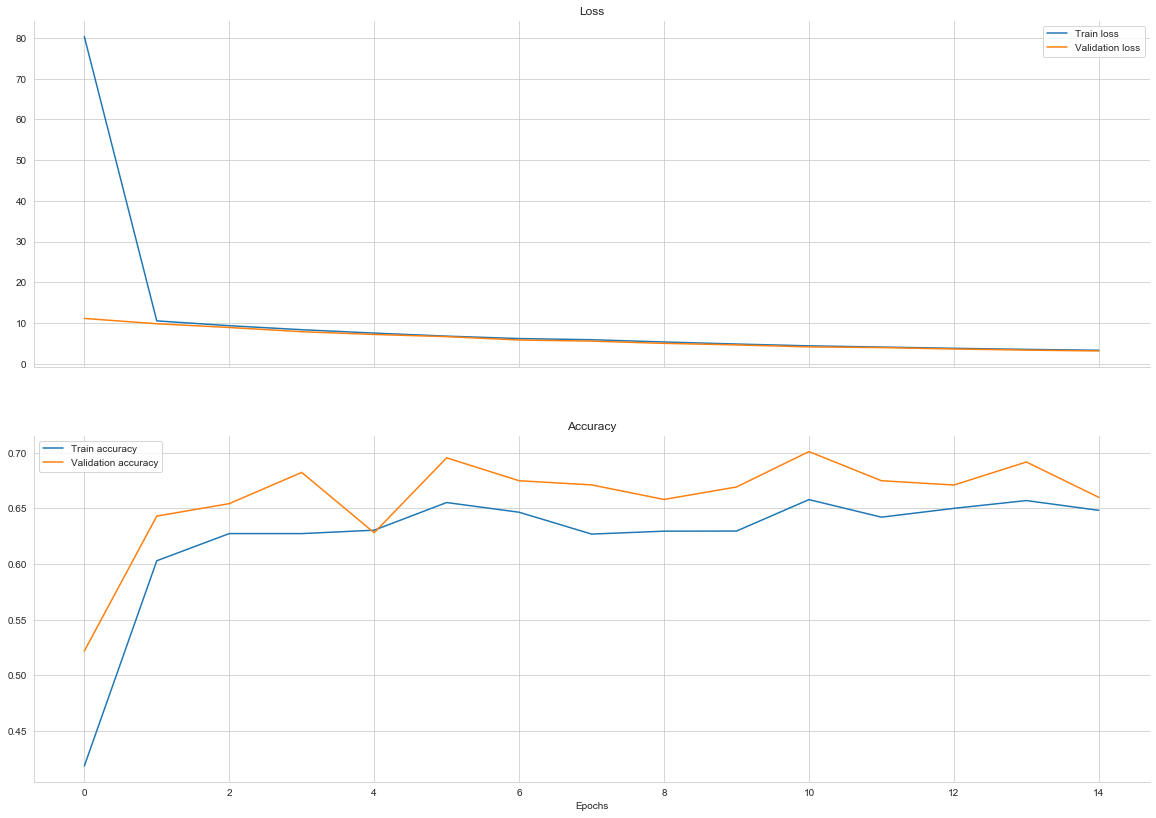

In [ ]:
history = {'loss': history2['loss'] , 
            'val_loss': history2['val_loss'] , 
            'accuracy': history2['accuracy'] , 
            'val_accuracy': history2['val_accuracy'] }

sns.set_style("whitegrid")
fig, (ax1, ax2) = plt.subplots(2, 1, sharex='col', figsize=(20, 14))

ax1.plot(history2['loss'], label='Train loss')
ax1.plot(history2['val_loss'], label='Validation loss')
ax1.legend(loc='best')
ax1.set_title('Loss')

ax2.plot(history2['accuracy'], label='Train accuracy')
ax2.plot(history2['val_accuracy'], label='Validation accuracy')
ax2.legend(loc='best')
ax2.set_title('Accuracy')

plt.xlabel('Epochs')
sns.despine()
plt.show()

**Confusion Matrices**

In [ ]:
N_CLASSES= 5
# Create empty arays to keep the predictions and labels
lastFullTrainPred = np.empty((0, N_CLASSES))
lastFullTrainLabels = np.empty((0, N_CLASSES))
lastFullValPred = np.empty((0, N_CLASSES))
lastFullValLabels = np.empty((0, N_CLASSES))

# Add train predictions and labels
for i in range(STEP_SIZE_TRAIN+1):
    im, lbl = next(train_generator)
    scores = model2.predict(im, batch_size=train_generator.batch_size)
    lastFullTrainPred = np.append(lastFullTrainPred, scores, axis=0)
    lastFullTrainLabels = np.append(lastFullTrainLabels, lbl, axis=0)

# Add validation predictions and labels
for i in range(STEP_SIZE_VALID+1):
    im, lbl = next(valid_generator)
    scores = model2.predict(im, batch_size=valid_generator.batch_size)
    lastFullValPred = np.append(lastFullValPred, scores, axis=0)
    lastFullValLabels = np.append(lastFullValLabels, lbl, axis=0)
    
    
lastFullComPred = np.concatenate((lastFullTrainPred, lastFullValPred))
lastFullComLabels = np.concatenate((lastFullTrainLabels, lastFullValLabels))
complete_labels = [np.argmax(label) for label in lastFullComLabels]

train_preds = [np.argmax(pred) for pred in lastFullTrainPred]
train_labels = [np.argmax(label) for label in lastFullTrainLabels]
validation_preds = [np.argmax(pred) for pred in lastFullValPred]
validation_labels = [np.argmax(label) for label in lastFullValLabels]

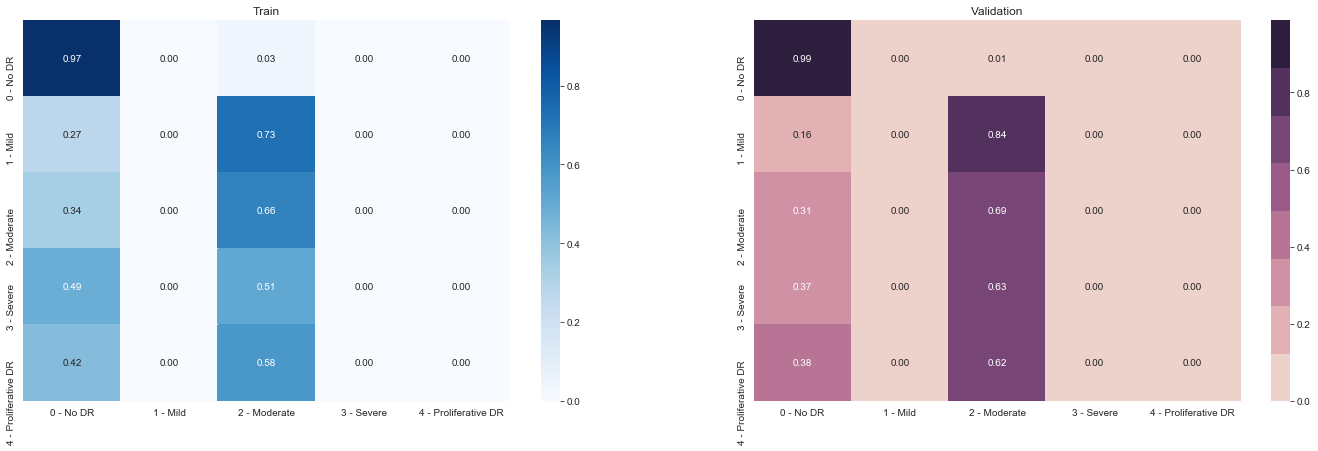

In [ ]:
from sklearn.metrics import confusion_matrix
fig, (ax1, ax2) = plt.subplots(1, 2, sharex='col', figsize=(24, 7))
labels = ['0 - No DR', '1 - Mild', '2 - Moderate', '3 - Severe', '4 - Proliferative DR']
train_cnf_matrix = confusion_matrix(train_labels, train_preds)
validation_cnf_matrix = confusion_matrix(validation_labels, validation_preds)

train_cnf_matrix_norm = train_cnf_matrix.astype('float') / train_cnf_matrix.sum(axis=1)[:, np.newaxis]
validation_cnf_matrix_norm = validation_cnf_matrix.astype('float') / validation_cnf_matrix.sum(axis=1)[:, np.newaxis]

train_df_cm = pd.DataFrame(train_cnf_matrix_norm, index=labels, columns=labels)
validation_df_cm = pd.DataFrame(validation_cnf_matrix_norm, index=labels, columns=labels)

sns.heatmap(train_df_cm, annot=True, fmt='.2f', cmap="Blues", ax=ax1).set_title('Train')
sns.heatmap(validation_df_cm, annot=True, fmt='.2f', cmap=sns.cubehelix_palette(8), ax=ax2).set_title('Validation')
plt.show()

**3.3.3 Data Augmentation+Tunning+TTA**

**Build the model**

In [ ]:
# build the model
model3 = Sequential()
    # number of filters to convolve with input volumne
    # number of filters conv layer will learn
model3.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', 
                 input_shape = (225,225,3)))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Conv2D(filters = 64, kernel_size = (6,6), activation='relu'))
model3.add(Dropout(0.5))
   
model3.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model3.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 
model3.add(Dense(units=128, activation='relu'))
model3.add(Conv2D(filters =96, kernel_size = (4,4),padding = 'Same',
                 activation ='relu'))
model3.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model3.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model3.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
# long vector of input data
model3.add(Dense(units=512))
model3.add(Flatten())
model3.add(Dense(units=256, activation='relu', 
                    kernel_regularizer=regularizers.l2(0.01)))
model3.add(Dense(5, activation = "softmax"))    

In [ ]:
# compile model
model3.compile(optimizer=Adam(lr=0.001),
              loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 225, 225, 32)      2432      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 107, 107, 64)      73792     
_________________________________________________________________
dropout_3 (Dropout)          (None, 107, 107, 64)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 107, 107, 64)      36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 53, 53, 64)        0         
_________________________________________________________________
dense_9 (Dense)              (None, 53, 53, 128)      

In [ ]:
model_yaml = model3.to_yaml()
with open("model3.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)

model3.save_weights("model3.h5")
print("Saved model to disk")

Saved model to disk


**Data Augmentation**

In [ ]:
# data augmentation
aug_gen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.2,  
        height_shift_range=0.2, 
        horizontal_flip=True,  
        vertical_flip=False,
        validation_split=0.2) 

In [ ]:
BATCH_SIZE = 60
EPOCHS = 2
train_generator = aug_gen.flow(X_train,y_train, batch_size=BATCH_SIZE, shuffle= True, subset='training', seed=SEED)
valid_generator = aug_gen.flow(X_train, y_train, batch_size=BATCH_SIZE, shuffle=True, subset='validation', seed=SEED)

**Tunning the model - Prevent Overfitting**

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
es= EarlyStopping(monitor='val_loss', mode ='min', 
                  verbose = 1, patience = 20)
mc = ModelCheckpoint('model3.h5', monitor='val_loss', save_best_only = True, 
                     mode ='min', verbose = 1)


In [ ]:
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = valid_generator.n//valid_generator.batch_size
CALLBACKS = [es,mc]

In [ ]:
history3_warmup = model3.fit_generator(generator = train_generator,
              steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data = valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs = EPOCHS,
                              verbose = 1,
                   callbacks = CALLBACKS).history

Epoch 1/2
46/46 [==============================] - ETA: 4:44 - loss: 10.2603 - accuracy: 0.640 - ETA: 4:46 - loss: 10.4185 - accuracy: 0.590 - ETA: 4:37 - loss: 10.4474 - accuracy: 0.593 - ETA: 4:27 - loss: 10.5776 - accuracy: 0.545 - ETA: 4:17 - loss: 10.5757 - accuracy: 0.552 - ETA: 4:09 - loss: 10.6358 - accuracy: 0.533 - ETA: 4:13 - loss: 10.6550 - accuracy: 0.525 - ETA: 4:18 - loss: 10.6697 - accuracy: 0.517 - ETA: 4:12 - loss: 10.6701 - accuracy: 0.511 - ETA: 4:03 - loss: 10.7024 - accuracy: 0.504 - ETA: 3:54 - loss: 10.7225 - accuracy: 0.498 - ETA: 3:47 - loss: 10.7388 - accuracy: 0.488 - ETA: 3:37 - loss: 10.7385 - accuracy: 0.490 - ETA: 3:29 - loss: 10.7495 - accuracy: 0.485 - ETA: 3:21 - loss: 10.7568 - accuracy: 0.488 - ETA: 3:15 - loss: 10.7799 - accuracy: 0.477 - ETA: 3:08 - loss: 10.7932 - accuracy: 0.474 - ETA: 3:01 - loss: 10.7981 - accuracy: 0.477 - ETA: 2:54 - loss: 10.8102 - accuracy: 0.478 - ETA: 2:47 - loss: 10.8210 - accuracy: 0.479 - ETA: 2:40 - loss: 10.8351 - a

C:\Users\danie\Anaconda3\lib\site-packages\keras\engine\saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


Epoch 2/2
46/46 [==============================] - ETA: 4:53 - loss: 10.4676 - accuracy: 0.540 - ETA: 4:51 - loss: 10.4075 - accuracy: 0.600 - ETA: 4:42 - loss: 10.4154 - accuracy: 0.586 - ETA: 4:32 - loss: 10.4383 - accuracy: 0.585 - ETA: 4:19 - loss: 10.3922 - accuracy: 0.604 - ETA: 4:08 - loss: 10.3784 - accuracy: 0.616 - ETA: 4:00 - loss: 10.3655 - accuracy: 0.617 - ETA: 3:53 - loss: 10.3442 - accuracy: 0.625 - ETA: 3:50 - loss: 10.3228 - accuracy: 0.631 - ETA: 3:45 - loss: 10.2958 - accuracy: 0.638 - ETA: 3:37 - loss: 10.3157 - accuracy: 0.623 - ETA: 3:30 - loss: 10.2935 - accuracy: 0.631 - ETA: 3:27 - loss: 10.2756 - accuracy: 0.638 - ETA: 3:21 - loss: 10.2818 - accuracy: 0.628 - ETA: 3:15 - loss: 10.2887 - accuracy: 0.625 - ETA: 3:09 - loss: 10.2965 - accuracy: 0.612 - ETA: 3:03 - loss: 10.2828 - accuracy: 0.611 - ETA: 2:57 - loss: 10.2660 - accuracy: 0.613 - ETA: 2:50 - loss: 10.2454 - accuracy: 0.615 - ETA: 2:44 - loss: 10.2453 - accuracy: 0.611 - ETA: 2:38 - loss: 10.2378 - a

In [ ]:
BATCH_SIZE = 60
EPOCHS = 20
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = valid_generator.n//valid_generator.batch_size
CALLBACKS = [es,mc]

In [ ]:
history3 = model3.fit_generator(generator = train_generator,
              steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data = valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs = EPOCHS,
                              verbose = 1,
                   callbacks = CALLBACKS).history

Epoch 1/20
46/46 [==============================] - ETA: 5:10 - loss: 9.6233 - accuracy: 0.62 - ETA: 4:43 - loss: 9.5847 - accuracy: 0.62 - ETA: 4:30 - loss: 9.5367 - accuracy: 0.66 - ETA: 4:17 - loss: 9.5280 - accuracy: 0.65 - ETA: 4:10 - loss: 9.5531 - accuracy: 0.62 - ETA: 4:06 - loss: 9.5254 - accuracy: 0.62 - ETA: 4:01 - loss: 9.5376 - accuracy: 0.60 - ETA: 3:55 - loss: 9.5269 - accuracy: 0.59 - ETA: 3:50 - loss: 9.5162 - accuracy: 0.59 - ETA: 3:44 - loss: 9.5202 - accuracy: 0.58 - ETA: 3:37 - loss: 9.4814 - accuracy: 0.59 - ETA: 3:31 - loss: 9.4613 - accuracy: 0.59 - ETA: 3:25 - loss: 9.4290 - accuracy: 0.60 - ETA: 3:20 - loss: 9.4306 - accuracy: 0.60 - ETA: 3:13 - loss: 9.4140 - accuracy: 0.60 - ETA: 3:07 - loss: 9.4048 - accuracy: 0.60 - ETA: 3:02 - loss: 9.3947 - accuracy: 0.60 - ETA: 2:57 - loss: 9.3718 - accuracy: 0.61 - ETA: 2:52 - loss: 9.3728 - accuracy: 0.60 - ETA: 2:46 - loss: 9.3595 - accuracy: 0.61 - ETA: 2:38 - loss: 9.3669 - accuracy: 0.60 - ETA: 2:32 - loss: 9.3586

46/46 [==============================] - ETA: 7:31 - loss: 5.6220 - accuracy: 0.62 - ETA: 8:04 - loss: 5.5039 - accuracy: 0.65 - ETA: 8:13 - loss: 5.5205 - accuracy: 0.64 - ETA: 8:18 - loss: 5.5276 - accuracy: 0.63 - ETA: 8:15 - loss: 5.5107 - accuracy: 0.64 - ETA: 8:07 - loss: 5.5401 - accuracy: 0.62 - ETA: 7:54 - loss: 5.5326 - accuracy: 0.63 - ETA: 7:40 - loss: 5.5445 - accuracy: 0.63 - ETA: 7:37 - loss: 5.5726 - accuracy: 0.61 - ETA: 7:28 - loss: 5.5741 - accuracy: 0.61 - ETA: 7:21 - loss: 5.5846 - accuracy: 0.61 - ETA: 7:12 - loss: 5.6011 - accuracy: 0.60 - ETA: 6:59 - loss: 5.5875 - accuracy: 0.61 - ETA: 6:46 - loss: 5.5895 - accuracy: 0.60 - ETA: 6:35 - loss: 5.5800 - accuracy: 0.61 - ETA: 6:21 - loss: 5.5871 - accuracy: 0.61 - ETA: 6:08 - loss: 5.5706 - accuracy: 0.61 - ETA: 6:00 - loss: 5.5644 - accuracy: 0.61 - ETA: 5:49 - loss: 5.5721 - accuracy: 0.61 - ETA: 5:38 - loss: 5.5573 - accuracy: 0.62 - ETA: 5:24 - loss: 5.5524 - accuracy: 0.62 - ETA: 5:11 - loss: 5.5578 - accuracy

46/46 [==============================] - ETA: 8:28 - loss: 3.4815 - accuracy: 0.74 - ETA: 9:01 - loss: 3.5905 - accuracy: 0.67 - ETA: 9:02 - loss: 3.5718 - accuracy: 0.64 - ETA: 8:53 - loss: 3.5654 - accuracy: 0.63 - ETA: 8:50 - loss: 3.5947 - accuracy: 0.62 - ETA: 8:39 - loss: 3.5640 - accuracy: 0.64 - ETA: 8:22 - loss: 3.5591 - accuracy: 0.65 - ETA: 8:02 - loss: 3.5320 - accuracy: 0.66 - ETA: 7:57 - loss: 3.5502 - accuracy: 0.64 - ETA: 7:43 - loss: 3.5650 - accuracy: 0.64 - ETA: 7:30 - loss: 3.5456 - accuracy: 0.64 - ETA: 7:14 - loss: 3.5433 - accuracy: 0.64 - ETA: 7:00 - loss: 3.5291 - accuracy: 0.64 - ETA: 6:46 - loss: 3.5241 - accuracy: 0.64 - ETA: 6:30 - loss: 3.5189 - accuracy: 0.64 - ETA: 6:19 - loss: 3.5074 - accuracy: 0.65 - ETA: 6:08 - loss: 3.5054 - accuracy: 0.65 - ETA: 5:56 - loss: 3.5148 - accuracy: 0.64 - ETA: 5:43 - loss: 3.5026 - accuracy: 0.65 - ETA: 5:31 - loss: 3.5004 - accuracy: 0.65 - ETA: 5:17 - loss: 3.5017 - accuracy: 0.65 - ETA: 5:02 - loss: 3.5024 - accuracy

46/46 [==============================] - ETA: 8:38 - loss: 2.4982 - accuracy: 0.66 - ETA: 8:13 - loss: 2.3663 - accuracy: 0.70 - ETA: 8:39 - loss: 2.3324 - accuracy: 0.70 - ETA: 8:27 - loss: 2.4401 - accuracy: 0.67 - ETA: 8:25 - loss: 2.4159 - accuracy: 0.67 - ETA: 8:44 - loss: 2.4129 - accuracy: 0.67 - ETA: 8:41 - loss: 2.4249 - accuracy: 0.67 - ETA: 8:24 - loss: 2.4007 - accuracy: 0.68 - ETA: 8:07 - loss: 2.4131 - accuracy: 0.68 - ETA: 7:52 - loss: 2.4054 - accuracy: 0.68 - ETA: 7:35 - loss: 2.4035 - accuracy: 0.68 - ETA: 7:21 - loss: 2.4023 - accuracy: 0.67 - ETA: 7:10 - loss: 2.4245 - accuracy: 0.66 - ETA: 6:56 - loss: 2.4040 - accuracy: 0.67 - ETA: 6:40 - loss: 2.3846 - accuracy: 0.68 - ETA: 6:26 - loss: 2.3777 - accuracy: 0.68 - ETA: 6:13 - loss: 2.3878 - accuracy: 0.67 - ETA: 6:00 - loss: 2.3843 - accuracy: 0.67 - ETA: 5:50 - loss: 2.3701 - accuracy: 0.68 - ETA: 5:39 - loss: 2.3746 - accuracy: 0.68 - ETA: 5:27 - loss: 2.3891 - accuracy: 0.67 - ETA: 5:13 - loss: 2.3809 - accuracy

**Loss VS Accuracy**

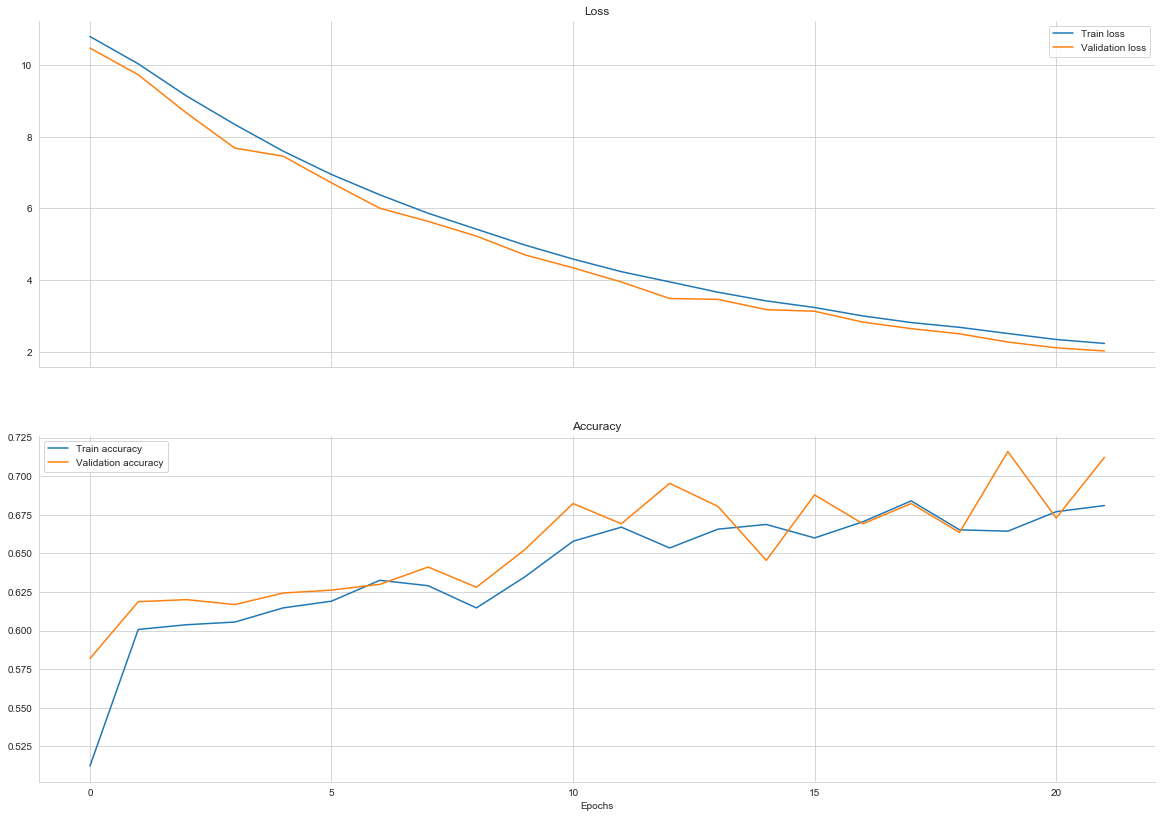

In [ ]:
history = {'loss': history3_warmup['loss'] + history3['loss'], 
           'val_loss': history3_warmup['val_loss'] + history3['val_loss'], 
           'accuracy': history3_warmup['accuracy'] + history3['accuracy'], 
           'val_accuracy': history3_warmup['val_accuracy'] + history3['val_accuracy']}

sns.set_style("whitegrid")
fig, (ax1, ax2) = plt.subplots(2, 1, sharex='col', figsize=(20, 14))

ax1.plot(history['loss'], label='Train loss')
ax1.plot(history['val_loss'], label='Validation loss')
ax1.legend(loc='best')
ax1.set_title('Loss')

ax2.plot(history['accuracy'], label='Train accuracy')
ax2.plot(history['val_accuracy'], label='Validation accuracy')
ax2.legend(loc='best')
ax2.set_title('Accuracy')

plt.xlabel('Epochs')
sns.despine()
plt.show()

In [ ]:
#model3.evaluate(X_test, y_test, 
 #              batch_size = BATCH_SIZE)

733/733 [==============================] - ETA: 14 - ETA: 13 - ETA: 11 - ETA: 10 - ETA: 9 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 17s 23ms/step


[3.347055434530136, 0.6916780471801758]

**Improve accuracy - use TTA**

In [ ]:
tta_steps = 10
BATCH_SIZE = 60
test_datagen = ImageDataGenerator(
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        rotation_range=10.,
        fill_mode='reflect', 
        width_shift_range = 0.1, 
        height_shift_range = 0.1)

#https://github.com/nathanhubens/TTA-Keras/blob/master/TTA-Keras.ipynb

In [ ]:
predictions = []

for i in tqdm(range(tta_steps)):
    preds = model3.predict_generator(
    test_datagen.flow(X_test, batch_size=BATCH_SIZE, shuffle = False),
                      steps = len(X_test)/BATCH_SIZE)
    predictions.append(preds)

100%|██████████| 10/10 [03:58<00:00, 21.27s/it]


In [ ]:
final_pred = np.mean(predictions, axis=0)

**Evaluate the model**

In [ ]:
print('Accuracy with TTA: ',np.mean(np.equal(np.argmax(y_test, axis=-1), 
                 np.argmax(final_pred, axis=-1))))

Accuracy with TTA:  0.7066848567530696


**Confusion Matrix**

In [ ]:
N_CLASSES= 5
# Create empty arays to keep the predictions and labels
lastFullTrainPred = np.empty((0, N_CLASSES))
lastFullTrainLabels = np.empty((0, N_CLASSES))
lastFullValPred = np.empty((0, N_CLASSES))
lastFullValLabels = np.empty((0, N_CLASSES))

# Add train predictions and labels
for i in range(STEP_SIZE_TRAIN+1):
    im, lbl = next(train_generator)
    scores = model3.predict(im, batch_size=train_generator.batch_size)
    lastFullTrainPred = np.append(lastFullTrainPred, scores, axis=0)
    lastFullTrainLabels = np.append(lastFullTrainLabels, lbl, axis=0)

# Add validation predictions and labels
for i in range(STEP_SIZE_VALID+1):
    im, lbl = next(valid_generator)
    scores = model3.predict(im, batch_size=valid_generator.batch_size)
    lastFullValPred = np.append(lastFullValPred, scores, axis=0)
    lastFullValLabels = np.append(lastFullValLabels, lbl, axis=0)
    
    
lastFullComPred = np.concatenate((lastFullTrainPred, lastFullValPred))
lastFullComLabels = np.concatenate((lastFullTrainLabels, lastFullValLabels))
complete_labels = [np.argmax(label) for label in lastFullComLabels]

train_preds = [np.argmax(pred) for pred in lastFullTrainPred]
train_labels = [np.argmax(label) for label in lastFullTrainLabels]
validation_preds = [np.argmax(pred) for pred in lastFullValPred]
validation_labels = [np.argmax(label) for label in lastFullValLabels]

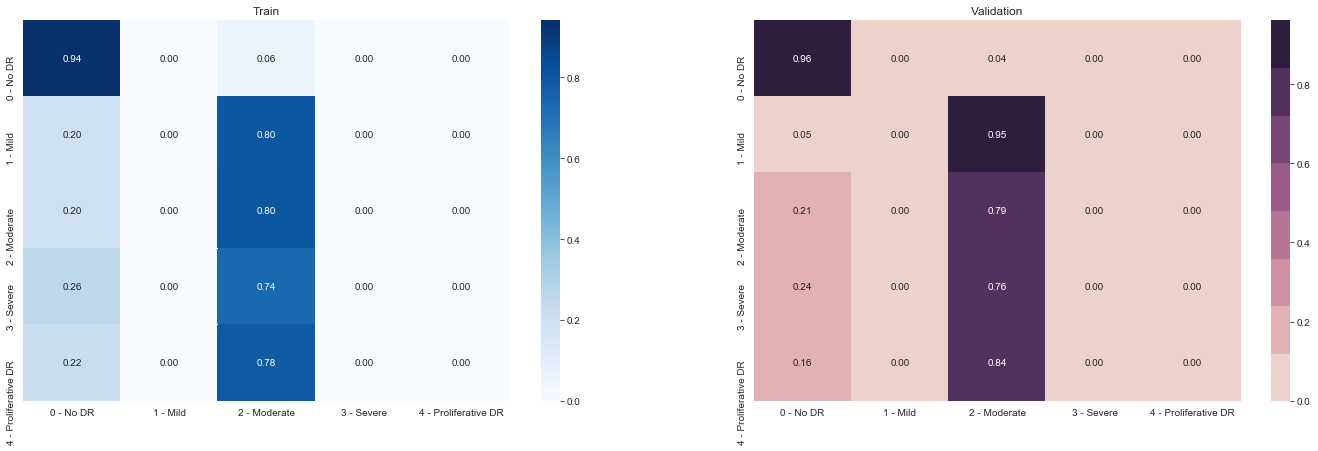

In [ ]:
from sklearn.metrics import confusion_matrix
fig, (ax1, ax2) = plt.subplots(1, 2, sharex='col', figsize=(24, 7))
labels = ['0 - No DR', '1 - Mild', '2 - Moderate', '3 - Severe', '4 - Proliferative DR']
train_cnf_matrix = confusion_matrix(train_labels, train_preds)
validation_cnf_matrix = confusion_matrix(validation_labels, validation_preds)

train_cnf_matrix_norm = train_cnf_matrix.astype('float') / train_cnf_matrix.sum(axis=1)[:, np.newaxis]
validation_cnf_matrix_norm = validation_cnf_matrix.astype('float') / validation_cnf_matrix.sum(axis=1)[:, np.newaxis]

train_df_cm = pd.DataFrame(train_cnf_matrix_norm, index=labels, columns=labels)
validation_df_cm = pd.DataFrame(validation_cnf_matrix_norm, index=labels, columns=labels)

sns.heatmap(train_df_cm, annot=True, fmt='.2f', cmap="Blues", ax=ax1).set_title('Train')
sns.heatmap(validation_df_cm, annot=True, fmt='.2f', cmap=sns.cubehelix_palette(8), ax=ax2).set_title('Validation')
plt.show()

**Impact of TTA**

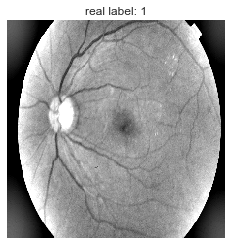

In [ ]:
image_ix = 2
test_image = X_test[image_ix]
plt.imshow(test_image)
plt.title(f'real label: {np.argmax(y_test[image_ix])}')
plt.axis('off');